In [1]:
from msmbuilder.utils import load
%pylab inline
import seaborn as sns
import msmexplorer as msme
from msmexplorer.palettes import *
import pandas as pd
import mdtraj as mdt
import numpy as np
import os 
import pandas as pd 
import numpy as np
import mdtraj as md
%pylab  inline
import seaborn as sns 

Populating the interactive namespace from numpy and matplotlib


/Users/muneeb/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['load']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Populating the interactive namespace from numpy and matplotlib


In [24]:
class Protein(object):
    def __init__(self, loc=os.path.abspath("../kernel_mdl/"),tic_index=0):
        self.loc = loc
        self.top = mdt.load(os.path.join(self.loc,"top.pdb"))
        self.df = pd.DataFrame(load("%s/feature_descriptor.pkl"%self.loc))
        
        
        self.meta_traj = mdt.load(os.path.join(self.loc,"metad_data","tic_%d"%tic_index,"tic_%d.xtc"%tic_index),top=self.top)
        
        self.tica_mdl = load("%s/tica_mdl.pkl"%self.loc)
        self.tica_mdl.weighted_transform = False
        self.tica_mdl.commute_mapping = False
        self.tica_feat  =load("%s/tica_data.pkl"%self.loc)

        
        self.kmeans_mdl = load("%s/kmeans_mdl.pkl"%self.loc)
        self.assignments = load("%s/assignments.pkl"%self.loc)
        self.msm_mdl = load("%s/msm_mdl.pkl"%self.loc)

In [51]:
shaw_training_inds=[22337, 37384, 21079, 18818, 34032,  8046, 33230,  8768, 33659,
       21386, 40896,  6583, 24395,  1703, 33804, 24607,  8404, 33517,
       31602, 32847, 32165, 33077, 14153, 14657, 37158, 38741, 32583,
       23406, 35820, 28077, 28222, 17046,  2831,  9374, 33830,  7085,
       36247, 29170, 32350, 33175, 18714, 32962, 25604, 33886, 37648,
       22345, 28227,  5104, 37812, 32785]


In [22]:
prj.msm_mdl.n_states_

50

In [25]:
prj = Protein()

In [26]:
sns.set_context("talk",1.3)
sns.set_style("white")

In [52]:
# To generate the featurizer object, please fill in shaw traj location here. 
# from msmbuilder.featurizer import LandMarkRMSDFeaturizer
# shaw_traj = md.load("SHAW TRAJ LOCATION")
# prj.feat = LandMarkRMSDFeaturizer(shaw_traj[shaw_training_inds])

In [27]:
prj.tica_mdl.n_components=10

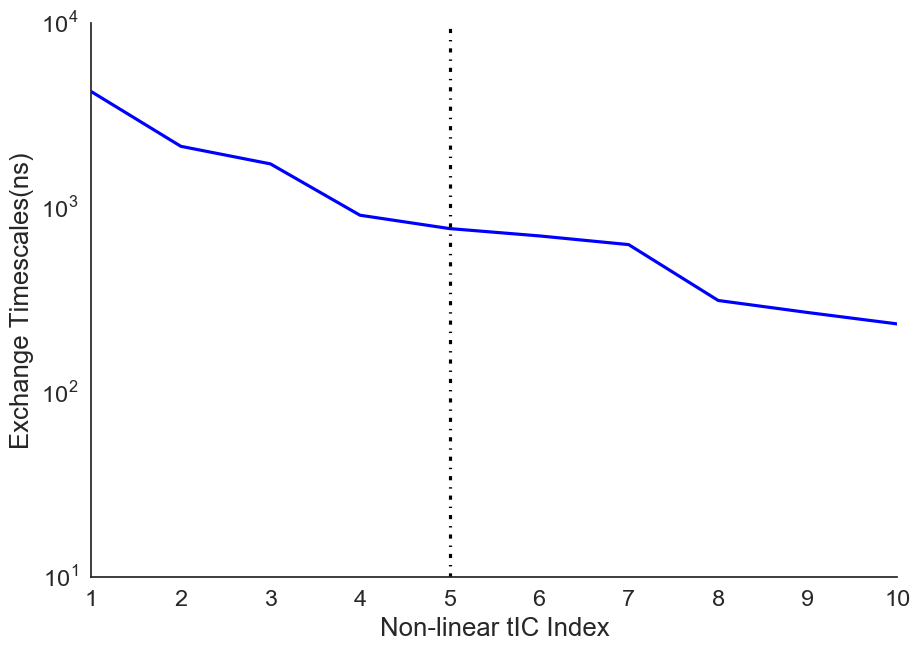

In [28]:
plot(25*prj.tica_mdl.timescales_,)
vlines(4,ymin=10**1,ymax=10**4,linestyles='-.',)
xticks(range(10),range(1,11))
semilogy()
ylim([10**1,10**4])
ylabel("Exchange Timescales(ns)")
xlabel("Non-linear tIC Index")
sns.despine()

In [29]:
prj.tica_mdl.n_components=5

In [30]:
prj.top

<mdtraj.Trajectory with 1 frames, 892 atoms, 58 residues, and unitcells at 0x116ebb550>

In [31]:
train_tica_data = load("%s/train_1ms_tica_data.pkl"%prj.loc)
landmark_data = prj.tica_mdl.transform(prj.feat.transform([prj.feat.sliced_reference_traj]))[0]

In [32]:
from msmexplorer.palettes.custom import msme_rgb

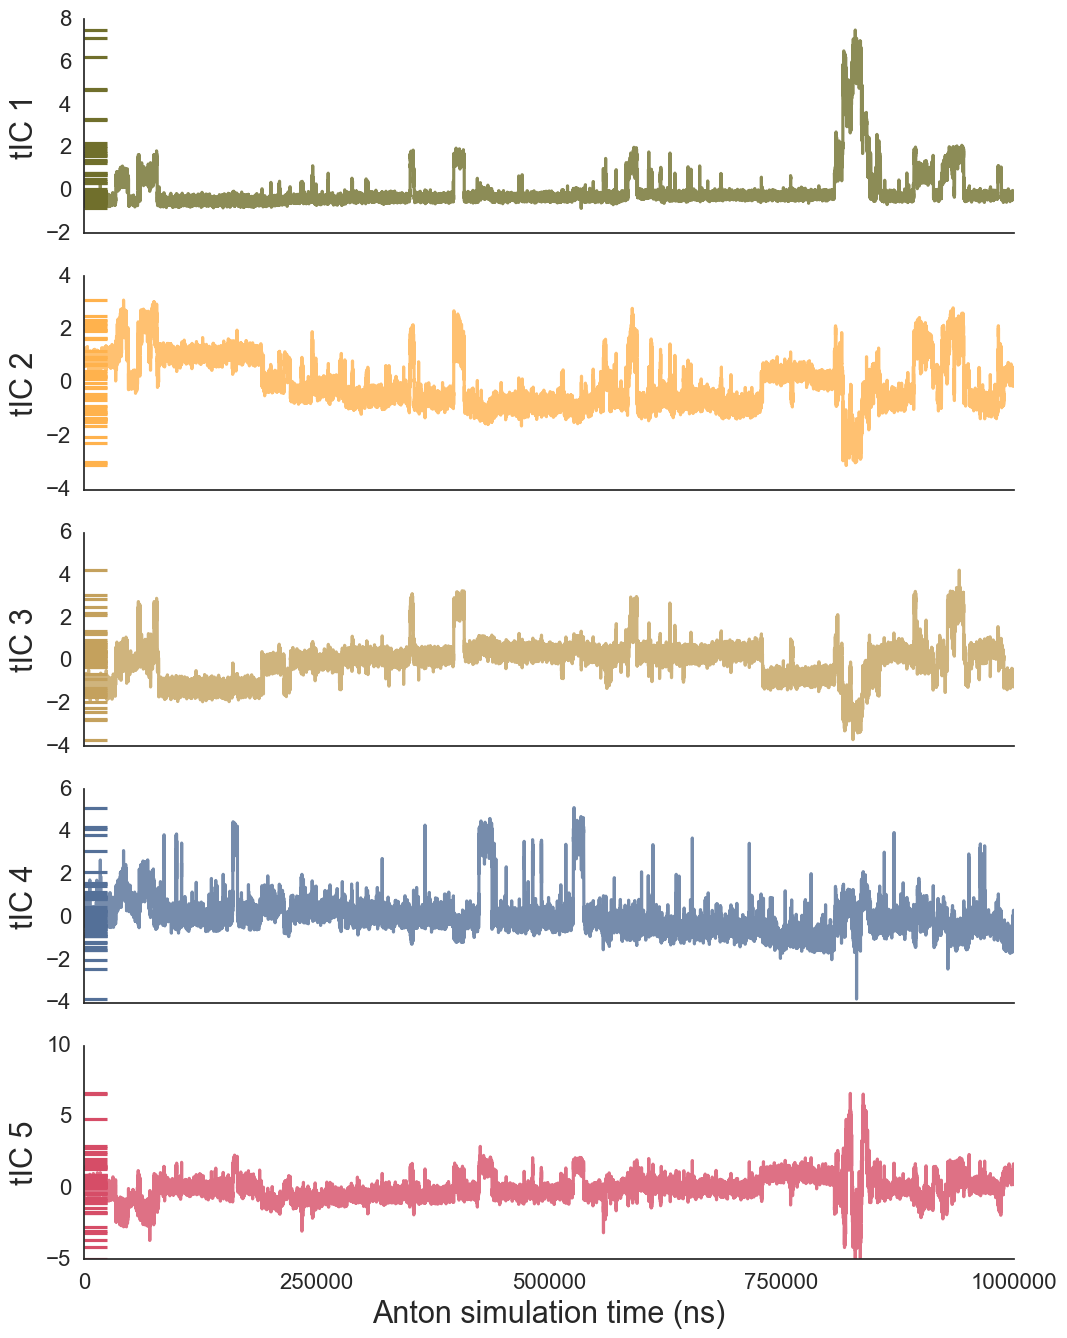

In [33]:
figure(figsize=(12,16))
for i in range(5):
    subplot(5,1,i+1)
    plot(np.arange(41250)*25,train_tica_data[:,i],c=list(msme_rgb.values())[i],alpha=0.8)
    hlines(landmark_data[:,i],0,25000,color=list(msme_rgb.values())[i])
    locator_params(axis='y',nbins=6)
    if i==4:
        xlim(0,1000000)
        xticks([0,1000000/4,1000000/2,3000000/4,1000000],[0,250000,500000,750000,1000000],size=16)
        xlabel(r'Anton simulation time (ns)',size=22)
    else:
        xlim(0,1000000)
        xticks([0,1000000/4,1000000/2,3000000/4,1000000],[],size=16)
    sns.despine()
    yticks(size=16)
    ylabel("tIC %d"%(i+1),size=22)


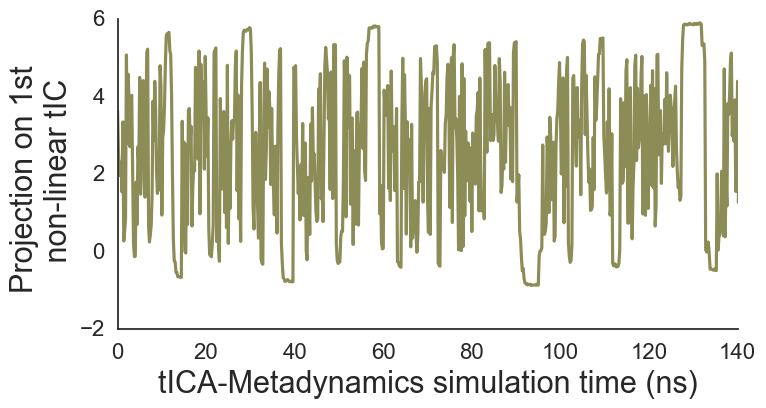

In [34]:
figure(figsize=(8,4))
for i in range(1):
    subplot(1,1,i+1)
    plot(prj.tica_mdl.transform(prj.feat.transform([prj.meta_traj]))[0][:,i],c=list(msme_rgb.values())[i],alpha=0.8)

    #plot(np.arange(41250)*25,train_tica_data[:,i],c=list(msme_rgb.values())[i],alpha=0.8)
    #hlines(landmark_data[:,i],0,25000,color=list(msme_rgb.values())[i])
    locator_params(axis='y',nbins=6)
    if i==0:
        xlim(0,700)
        xticks([0,100,200,300,400,500,600,700],[0,20,40,60,80,100,120,140],size=16)
        xlabel("tICA-Metadynamics simulation time (ns)",size=22)
    else:
        xlim(0,700)
        xticks([0,100,200,300,400,500,600,700],[],size=16)
    sns.despine()
    yticks(size=16)
    ylabel("Projection on 1st \n non-linear tIC",size=22)


In [37]:
prj.tica_mdl.n_components=10

In [38]:
extended_meta_data = prj.tica_mdl.transform(prj.feat.transform([prj.meta_traj]))

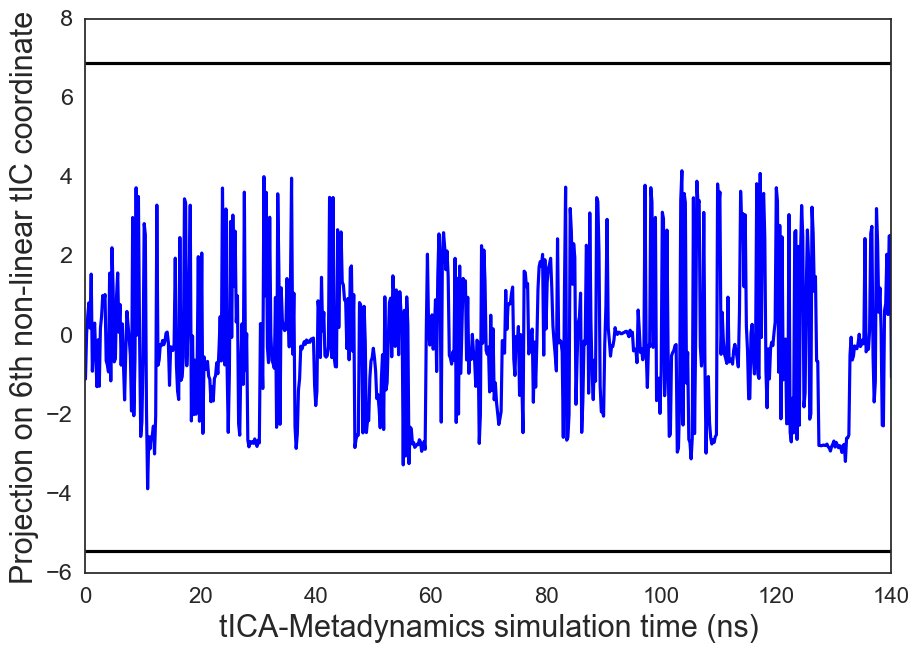

In [50]:
plot(extended_meta_data[0][:,5])
hlines(-5.4336492970294676,0,700)
hlines(6.8920442736963565,0,700)
if i==0:
    xlim(0,700)
    xticks([0,100,200,300,400,500,600,700],[0,20,40,60,80,100,120,140],size=16)
    xlabel("tICA-Metadynamics simulation time (ns)",size=22)
ylabel("Projection on 6th non-linear tIC coordinate",size=22)